### COMPARISON: Scanning slit beam profiler data vs. CMOS camera data

CMOS Data:
Processed 45 valid data points out of 45 files.
z = 40.0 mm, Width_x = 1.327 mm, Width_y = 1.230 mm
z = 40.5 mm, Width_x = 1.226 mm, Width_y = 1.139 mm
z = 41.0 mm, Width_x = 1.127 mm, Width_y = 1.048 mm
z = 41.5 mm, Width_x = 1.028 mm, Width_y = 0.959 mm
z = 42.0 mm, Width_x = 0.931 mm, Width_y = 0.866 mm
z = 42.5 mm, Width_x = 0.832 mm, Width_y = 0.776 mm
z = 43.0 mm, Width_x = 0.735 mm, Width_y = 0.687 mm
z = 43.5 mm, Width_x = 0.639 mm, Width_y = 0.598 mm
z = 44.0 mm, Width_x = 0.545 mm, Width_y = 0.512 mm
z = 44.5 mm, Width_x = 0.453 mm, Width_y = 0.425 mm
z = 45.0 mm, Width_x = 0.368 mm, Width_y = 0.350 mm
z = 45.5 mm, Width_x = 0.295 mm, Width_y = 0.285 mm
z = 46.0 mm, Width_x = 0.236 mm, Width_y = 0.232 mm
z = 46.1 mm, Width_x = 0.227 mm, Width_y = 0.224 mm
z = 46.2 mm, Width_x = 0.219 mm, Width_y = 0.217 mm
z = 46.3 mm, Width_x = 0.211 mm, Width_y = 0.210 mm
z = 46.4 mm, Width_x = 0.204 mm, Width_y = 0.205 mm
z = 46.5 mm, Width_x = 0.198 mm, Width_y = 0.200 mm
z = 4

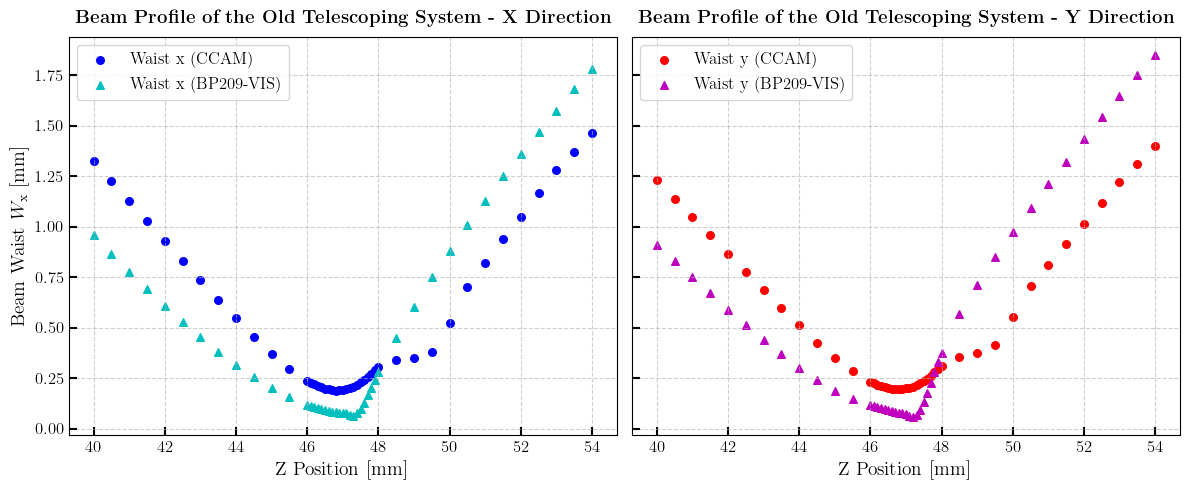

In [15]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data paths
data_path_cmos = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_CMOS"
data_path_bp209 = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_LB1471-C"
fig_dir = os.path.join(data_path_cmos, "fig_comparison")
os.makedirs(fig_dir, exist_ok=True)

# CMOS data
file_list_cmos = sorted([f for f in glob.glob(os.path.join(data_path_cmos, "*mm Beam Results.csv")) 
                         if "before lens" not in os.path.basename(f).lower()])
z_values_cmos = []
width_x_cmos = []
width_y_cmos = []

# Extract CMOS data
for file in file_list_cmos:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    z_values_cmos.append(z)

    with open(file, 'r') as f:
        lines = f.readlines()

    for line in lines:
        if "Width x" in line:
            width_x_cmos.append(float(line.split()[2])/2)
        if "Width y" in line:
            width_y_cmos.append(float(line.split()[2])/2)

# Convert CMOS data to numpy arrays and sort
z_values_cmos = np.array(z_values_cmos)
width_x_cmos = np.array(width_x_cmos)
width_y_cmos = np.array(width_y_cmos)
sorted_indices_cmos = np.argsort(z_values_cmos)
z_values_cmos = z_values_cmos[sorted_indices_cmos]
width_x_cmos = width_x_cmos[sorted_indices_cmos]
width_y_cmos = width_y_cmos[sorted_indices_cmos]

# BP209-VIS data
file_list_bp209 = sorted([f for f in glob.glob(os.path.join(data_path_bp209, "*mm_#001.txt")) 
                           if "before lens" not in os.path.basename(f).lower()],
                          key=lambda f: float(os.path.basename(f).split('mm')[0]))
z_values_bp209 = []
width_x_bp209 = []
width_y_bp209 = []

# Extract BP209-VIS data
for file in file_list_bp209:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    if clip_width_x is not None and clip_width_y is not None:
        width_x_bp209.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y_bp209.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values_bp209.append(z)
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert BP209-VIS data to numpy arrays and sort
z_values_bp209 = np.array(z_values_bp209)
width_x_bp209 = np.array(width_x_bp209)
width_y_bp209 = np.array(width_y_bp209)
sorted_indices_bp209 = np.argsort(z_values_bp209)
z_values_bp209 = z_values_bp209[sorted_indices_bp209]
width_x_bp209 = width_x_bp209[sorted_indices_bp209]
width_y_bp209 = width_y_bp209[sorted_indices_bp209]

# Print data
print("CMOS Data:")
print(f"Processed {len(z_values_cmos)} valid data points out of {len(file_list_cmos)} files.")
for z, wx, wy in zip(z_values_cmos, width_x_cmos, width_y_cmos):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nBP209-VIS Data:")
print(f"Processed {len(z_values_bp209)} valid data points out of {len(file_list_bp209)} files.")
for z, wx, wy in zip(z_values_bp209, width_x_bp209, width_y_bp209):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Min waist values
min_waist_exp_x_cmos = min(width_x_cmos) * 1000
min_waist_exp_y_cmos = min(width_y_cmos) * 1000
min_waist_exp_x_bp209 = min(width_x_bp209) * 1000
min_waist_exp_y_bp209 = min(width_y_bp209) * 1000

print("\nBEAM WAIST SUMMARY")
print("CMOS Experimental:")
print(f"  Min Waist X: {min_waist_exp_x_cmos:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y_cmos:.2f} μm")
print("BP209-VIS Experimental:")
print(f"  Min Waist X (Clip): {min_waist_exp_x_bp209:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y_bp209:.2f} μm")

# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Width x comparison
ax1.scatter(z_values_cmos, width_x_cmos, color='b', label='Waist x (CCAM)', marker='o', s=30)
ax1.scatter(z_values_bp209, width_x_bp209, color='c', label='Waist x (BP209-VIS)', marker='^', s=30)
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile of the Old Telescoping System - X Direction}', fontsize=13.5, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=12, frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot Width y comparison
ax2.scatter(z_values_cmos, width_y_cmos, color='r', label='Waist y (CCAM)', marker='o', s=30)
ax2.scatter(z_values_bp209, width_y_bp209, color='m', label='Waist y (BP209-VIS)', marker='^', s=30)
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile of the Old Telescoping System - Y Direction}', fontsize=13.5, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=12, frameon=True)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_comparison.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()

Comparison with data from 26th September 2025, i.e. QPD gap exploited as knife edge to perform laser focusing measurement with an angled scan using only two quadrants

Angled scan quadA - Along: 2306 µm, Z: 50.0 mm, Beam waist (DC): 110.03 µm
Angled scan quadD - Along: 2306 µm, Z: 50.0 mm, Beam waist (DC): 137.27 µm
Angled scan quadA - Along: 2306 µm, Z: 51.0 mm, Beam waist (DC): 76.65 µm
Angled scan quadD - Along: 2306 µm, Z: 51.0 mm, Beam waist (DC): 100.97 µm
Angled scan quadA - Along: 2306 µm, Z: 52.0 mm, Beam waist (DC): 35.03 µm
Angled scan quadD - Along: 2306 µm, Z: 52.0 mm, Beam waist (DC): 50.38 µm
Angled scan quadA - Along: 2306 µm, Z: 53.0 mm, Beam waist (DC): 43.68 µm
Angled scan quadD - Along: 2306 µm, Z: 53.0 mm, Beam waist (DC): 42.57 µm
Angled scan quadA - Along: 2306 µm, Z: 52.5 mm, Beam waist (DC): 37.57 µm
Angled scan quadD - Along: 2306 µm, Z: 52.5 mm, Beam waist (DC): 37.32 µm
Angled scan quadA - Along: 2306 µm, Z: 54.0 mm, Beam waist (DC): 57.24 µm
Angled scan quadD - Along: 2306 µm, Z: 54.0 mm, Beam waist (DC): 61.90 µm
CMOS Data:
Processed 45 valid data points out of 45 files.
z = 40.0 mm, Width_x = 1.327 mm, Width_y = 1.230 m

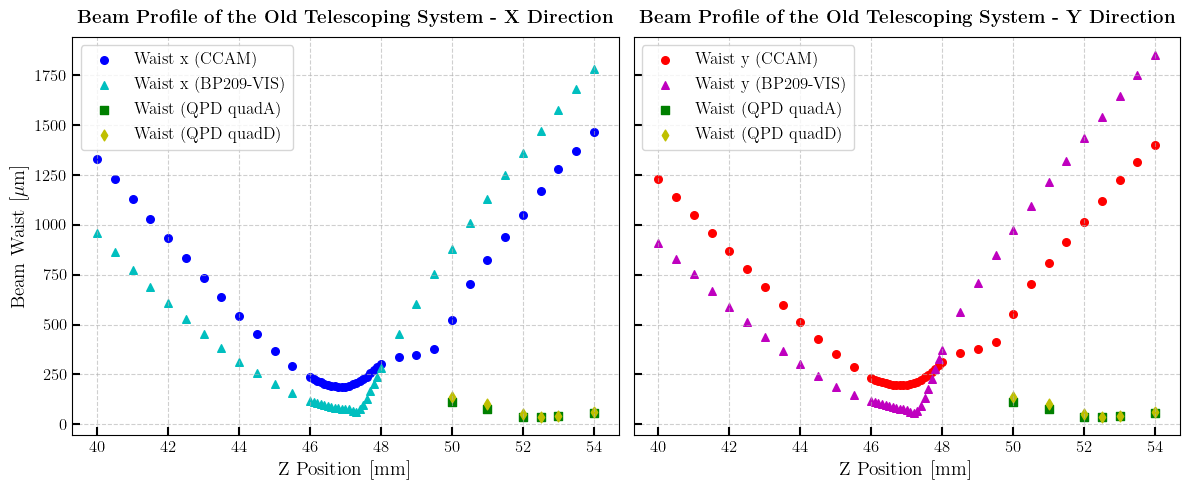

In [21]:
import os
import glob
import pickle
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.optimize import curve_fit
from scipy.special import erf

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Error function for curve fitting
def erf_model(u, A, B, C, D):
    return A * erf(B * (u - C)) + D

# Data paths
data_path_cmos = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_CMOS"
data_path_bp209 = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_LB1471-C"
data_path_angled = "/Users/asca/Documents/University/Master Thesis/code/Data/manual setup/20250926/VIGO17_333-1_QPD_0750_20_AW_011_CC_250926_LB1471C_quadA&D_manual_setup_AngledScan"
fig_dir = os.path.join(data_path_cmos, "fig_comparison")
os.makedirs(fig_dir, exist_ok=True)

# CMOS data
file_list_cmos = sorted([f for f in glob.glob(os.path.join(data_path_cmos, "*mm Beam Results.csv")) 
                         if "before lens" not in os.path.basename(f).lower()])
z_values_cmos = []
width_x_cmos = []
width_y_cmos = []

# Extract CMOS data
for file in file_list_cmos:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    z_values_cmos.append(z)

    with open(file, 'r') as f:
        lines = f.readlines()

    for line in lines:
        if "Width x" in line:
            width_x_cmos.append(float(line.split()[2])/2)  # mm, radius
        if "Width y" in line:
            width_y_cmos.append(float(line.split()[2])/2)  # mm, radius

# Convert CMOS data to numpy arrays and sort
z_values_cmos = np.array(z_values_cmos)
width_x_cmos = np.array(width_x_cmos)
width_y_cmos = np.array(width_y_cmos)
sorted_indices_cmos = np.argsort(z_values_cmos)
z_values_cmos = z_values_cmos[sorted_indices_cmos]
width_x_cmos = width_x_cmos[sorted_indices_cmos]
width_y_cmos = width_y_cmos[sorted_indices_cmos]

# BP209-VIS data
file_list_bp209 = sorted([f for f in glob.glob(os.path.join(data_path_bp209, "*mm_#001.txt")) 
                          if "before lens" not in os.path.basename(f).lower()],
                         key=lambda f: float(os.path.basename(f).split('mm')[0]))
z_values_bp209 = []
width_x_bp209 = []
width_y_bp209 = []

# Extract BP209-VIS data
for file in file_list_bp209:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    if clip_width_x is not None and clip_width_y is not None:
        width_x_bp209.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y_bp209.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values_bp209.append(z)
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert BP209-VIS data to numpy arrays and sort
z_values_bp209 = np.array(z_values_bp209)
width_x_bp209 = np.array(width_x_bp209)
width_y_bp209 = np.array(width_y_bp209)
sorted_indices_bp209 = np.argsort(z_values_bp209)
z_values_bp209 = z_values_bp209[sorted_indices_bp209]
width_x_bp209 = width_x_bp209[sorted_indices_bp209]
width_y_bp209 = width_y_bp209[sorted_indices_bp209]

# Angled scan quadA&D data
file_list_angled = sorted(glob.glob(os.path.join(data_path_angled, "*.pkl")))
segns = ['quadA', 'quadD']
procdata_angled = {segn: {'z_positions': [], 'beamwaist_dc': [], 'along_positions': []} for segn in segns}

# Function to load data
def load_data(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

# Function to extract Along position from filename
def extract_along_position(file_path):
    match = re.search(r'(?:Along|Y)(\d+)um', file_path)
    if match:
        return int(match.group(1))  # Return in µm
    print(f"Warning: Could not extract Along/Y position from {file_path}")
    return None

# Function to extract Z position from filename
def extract_z_position(file_path):
    match = re.search(r'Z(\d+)um', file_path)
    if match:
        z_um = int(match.group(1))  # Z position in µm
        z_mm = z_um / 1000  # Convert to mm
        return z_mm
    print(f"Warning: Could not extract Z position from {file_path}")
    return None

# Extract angled scan data
for file_path in file_list_angled:
    along_um = extract_along_position(file_path)
    z_mm = extract_z_position(file_path)
    if along_um is None or z_mm is None:
        print(f"Skipping {file_path}: Missing Along or Z position")
        continue

    data = load_data(file_path)
    u_array = data['rawdata']['u_position']  # Keep in mm for fit, as in original script

    for segn in segns:
        if segn in data['rawdata'] and 'dmm00_curr_amp' in data['rawdata'][segn]:
            dc_curr_avg = np.mean(data['rawdata'][segn]['dmm00_curr_amp'], axis=1)
            if len(u_array) != len(dc_curr_avg):
                print(f"Error: u_array and dc_curr_avg length mismatch for {file_path}, segment {segn}.")
                continue
            initial_guess_dc = [np.max(dc_curr_avg) - np.min(dc_curr_avg), 1.0, np.mean(u_array), np.min(dc_curr_avg)]
            try:
                params_dc, _ = curve_fit(erf_model, u_array, dc_curr_avg, p0=initial_guess_dc, 
                                        bounds=([-np.inf, 0, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
                A_fit_dc, B_fit_dc, u0_fit_dc, C_fit_dc = params_dc
                spot_size_dc = 1 / (np.sqrt(2) * B_fit_dc) * 1000  # Convert to µm
                if spot_size_dc > 300:  # Threshold from original script
                    print(f"Warning: Large beam waist ({spot_size_dc:.2f} µm) for {file_path}, segment {segn}. Possible bad fit.")
                else:
                    procdata_angled[segn]['z_positions'].append(z_mm)
                    procdata_angled[segn]['beamwaist_dc'].append(spot_size_dc)
                    procdata_angled[segn]['along_positions'].append(along_um)
                    print(f"Angled scan {segn} - Along: {along_um} µm, Z: {z_mm:.1f} mm, Beam waist (DC): {spot_size_dc:.2f} µm")
            except (RuntimeError, ValueError) as e:
                print(f"Fit error for {file_path}, segment {segn}: {e}. Skipping.")
                continue
        else:
            print(f"Warning: No data for {segn} in {file_path}")

# Use full angled scan data without averaging
z_values_angled_a = np.array(procdata_angled['quadA']['z_positions'])
beam_waist_angled_a = np.array(procdata_angled['quadA']['beamwaist_dc'])
along_angled_a = np.array(procdata_angled['quadA']['along_positions'])
z_values_angled_d = np.array(procdata_angled['quadD']['z_positions'])
beam_waist_angled_d = np.array(procdata_angled['quadD']['beamwaist_dc'])
along_angled_d = np.array(procdata_angled['quadD']['along_positions'])

# Print data
print("CMOS Data:")
print(f"Processed {len(z_values_cmos)} valid data points out of {len(file_list_cmos)} files.")
for z, wx, wy in zip(z_values_cmos, width_x_cmos, width_y_cmos):
    print(f"z = {z:.1f} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nBP209-VIS Data:")
print(f"Processed {len(z_values_bp209)} valid data points out of {len(file_list_bp209)} files.")
for z, wx, wy in zip(z_values_bp209, width_x_bp209, width_y_bp209):
    print(f"z = {z:.1f} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nAngled Scan quadA Data:")
print(f"Processed {len(z_values_angled_a)} valid data points.")
for z, w, along in zip(z_values_angled_a, beam_waist_angled_a, along_angled_a):
    print(f"Along = {along} µm, z = {z:.1f} mm, Beam waist (DC): {w:.2f} µm")

print("\nAngled Scan quadD Data:")
print(f"Processed {len(z_values_angled_d)} valid data points.")
for z, w, along in zip(z_values_angled_d, beam_waist_angled_d, along_angled_d):
    print(f"Along = {along} µm, z = {z:.1f} mm, Beam waist (DC): {w:.2f} µm")

# Min waist values
min_waist_exp_x_cmos = min(width_x_cmos) * 1000 if width_x_cmos.size > 0 else float('inf')
min_waist_exp_y_cmos = min(width_y_cmos) * 1000 if width_y_cmos.size > 0 else float('inf')
min_waist_exp_x_bp209 = min(width_x_bp209) * 1000 if width_x_bp209.size > 0 else float('inf')
min_waist_exp_y_bp209 = min(width_y_bp209) * 1000 if width_y_bp209.size > 0 else float('inf')
min_waist_angled_a = min(beam_waist_angled_a) if beam_waist_angled_a.size > 0 else float('inf')
min_waist_angled_d = min(beam_waist_angled_d) if beam_waist_angled_d.size > 0 else float('inf')

print("\nBEAM WAIST SUMMARY")
print("CMOS Experimental:")
print(f"  Min Waist X: {min_waist_exp_x_cmos:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y_cmos:.2f} μm")
print("BP209-VIS Experimental:")
print(f"  Min Waist X (Clip): {min_waist_exp_x_bp209:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y_bp209:.2f} μm")
print("Angled Scan quadA Experimental:")
print(f"  Min Waist (DC): {min_waist_angled_a:.2f} μm")
print("Angled Scan quadD Experimental:")
print(f"  Min Waist (DC): {min_waist_angled_d:.2f} μm")

# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Width x comparison
ax1.scatter(z_values_cmos, width_x_cmos * 1000, color='b', label='Waist x (CCAM)', marker='o', s=30)
ax1.scatter(z_values_bp209, width_x_bp209 * 1000, color='c', label='Waist x (BP209-VIS)', marker='^', s=30)
ax1.scatter(z_values_angled_a, beam_waist_angled_a, color='g', label='Waist (QPD quadA)', marker='s', s=30)
ax1.scatter(z_values_angled_d, beam_waist_angled_d, color='y', label='Waist (QPD quadD)', marker='d', s=30)
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Waist [$\mu$m]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile of the Old Telescoping System - X Direction}', fontsize=13.5, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=12, frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot Width y comparison
ax2.scatter(z_values_cmos, width_y_cmos * 1000, color='r', label='Waist y (CCAM)', marker='o', s=30)
ax2.scatter(z_values_bp209, width_y_bp209 * 1000, color='m', label='Waist y (BP209-VIS)', marker='^', s=30)
ax2.scatter(z_values_angled_a, beam_waist_angled_a, color='g', label='Waist (QPD quadA)', marker='s', s=30)
ax2.scatter(z_values_angled_d, beam_waist_angled_d, color='y', label='Waist (QPD quadD)', marker='d', s=30)
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile of the Old Telescoping System - Y Direction}', fontsize=13.5, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=12, frameon=True)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_comparison_with_angled.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()

Comparison with data from 17th June 2025, i.e. QPD gap exploited as knife edge to perform laser focusing measurement

QPD quadA - Z position: 38.0 mm, Beam waist (DC): 117.09 µm
QPD quadA - Z position: 37.8 mm, Beam waist (DC): 107.51 µm
QPD quadA - Z position: 37.6 mm, Beam waist (DC): 96.75 µm
QPD quadA - Z position: 37.4 mm, Beam waist (DC): 88.47 µm
QPD quadA - Z position: 37.2 mm, Beam waist (DC): 79.20 µm
QPD quadA - Z position: 37.0 mm, Beam waist (DC): 71.68 µm
QPD quadA - Z position: 36.9 mm, Beam waist (DC): 68.09 µm
QPD quadA - Z position: 36.8 mm, Beam waist (DC): 63.99 µm
QPD quadA - Z position: 36.7 mm, Beam waist (DC): 60.01 µm
QPD quadA - Z position: 36.6 mm, Beam waist (DC): 57.26 µm
QPD quadA - Z position: 36.5 mm, Beam waist (DC): 53.96 µm
QPD quadA - Z position: 36.4 mm, Beam waist (DC): 51.29 µm
QPD quadA - Z position: 36.3 mm, Beam waist (DC): 48.58 µm
QPD quadA - Z position: 36.2 mm, Beam waist (DC): 46.34 µm
QPD quadA - Z position: 36.1 mm, Beam waist (DC): 44.41 µm
QPD quadA - Z position: 36.0 mm, Beam waist (DC): 42.52 µm
QPD quadA - Z position: 35.9 mm, Beam waist (DC): 41.7

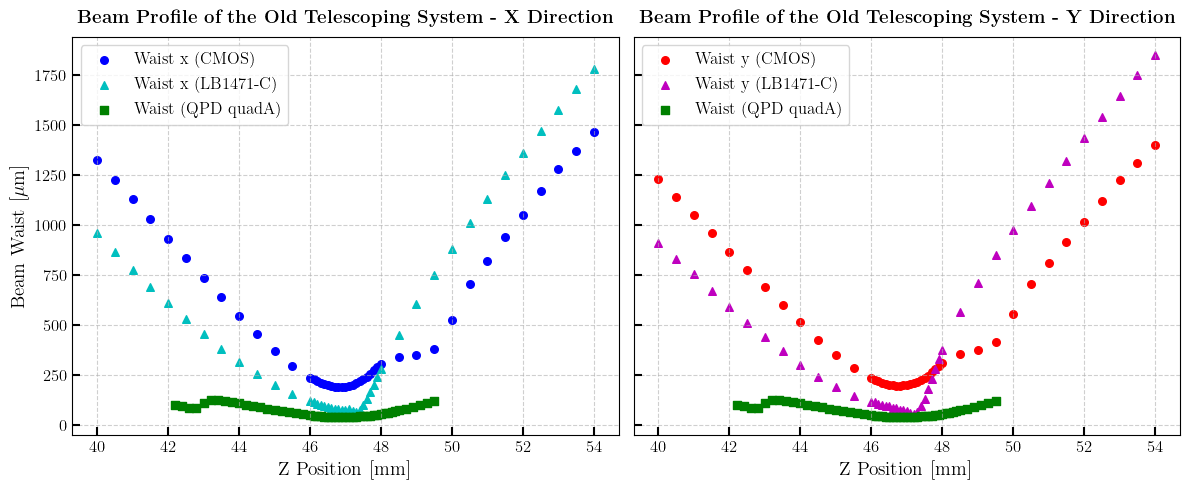

In [22]:
import os
import glob
import pickle
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.optimize import curve_fit
from scipy.special import erf

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Error function for curve fitting (from third script)
def erf_model(x, A, B, C, D):
    return A * erf(B * (x - C)) + D

# Data paths
data_path_cmos = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_CMOS"
data_path_lb1471 = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_LB1471-C"
data_path_qpd = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_015_CC_asca_250617_focus_laser_thres_LB1471C_quadA/Y6100um"
fig_dir = os.path.join(data_path_cmos, "fig_comparison")
os.makedirs(fig_dir, exist_ok=True)

# CMOS data
file_list_cmos = sorted([f for f in glob.glob(os.path.join(data_path_cmos, "*mm Beam Results.csv")) 
                         if "before lens" not in os.path.basename(f).lower()])
z_values_cmos = []
width_x_cmos = []
width_y_cmos = []

# Extract CMOS data
for file in file_list_cmos:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    z_values_cmos.append(z)

    with open(file, 'r') as f:
        lines = f.readlines()

    for line in lines:
        if "Width x" in line:
            width_x_cmos.append(float(line.split()[2])/2)  # mm, radius
        if "Width y" in line:
            width_y_cmos.append(float(line.split()[2])/2)  # mm, radius

# Convert CMOS data to numpy arrays and sort
z_values_cmos = np.array(z_values_cmos)
width_x_cmos = np.array(width_x_cmos)
width_y_cmos = np.array(width_y_cmos)
sorted_indices_cmos = np.argsort(z_values_cmos)
z_values_cmos = z_values_cmos[sorted_indices_cmos]
width_x_cmos = width_x_cmos[sorted_indices_cmos]
width_y_cmos = width_y_cmos[sorted_indices_cmos]

# LB1471-C data
file_list_lb1471 = sorted([f for f in glob.glob(os.path.join(data_path_lb1471, "*mm_#001.txt")) 
                           if "before lens" not in os.path.basename(f).lower()],
                          key=lambda f: float(os.path.basename(f).split('mm')[0]))
z_values_lb1471 = []
width_x_lb1471 = []
width_y_lb1471 = []

# Extract LB1471-C data
for file in file_list_lb1471:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    if clip_width_x is not None and clip_width_y is not None:
        width_x_lb1471.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y_lb1471.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values_lb1471.append(z)
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert LB1471-C data to numpy arrays and sort
z_values_lb1471 = np.array(z_values_lb1471)
width_x_lb1471 = np.array(width_x_lb1471)
width_y_lb1471 = np.array(width_y_lb1471)
sorted_indices_lb1471 = np.argsort(z_values_lb1471)
z_values_lb1471 = z_values_lb1471[sorted_indices_lb1471]
width_x_lb1471 = width_x_lb1471[sorted_indices_lb1471]
width_y_lb1471 = width_y_lb1471[sorted_indices_lb1471]

# QPD quadA data
file_list_qpd = sorted(glob.glob(os.path.join(data_path_qpd, "*.pkl")))
z_values_qpd = []
beam_waist_qpd = []

# Function to extract Z position from QPD filenames
def extract_z_position(file_path):
    match = re.search(r'Z(\d+)um', file_path)
    if match:
        z_um = int(match.group(1))  # Z position in µm
        z_mm = z_um / 1000  # Convert to mm
        return z_mm
    return None

# Function to load QPD data
def load_data(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

# Extract QPD quadA beam waist
for file in file_list_qpd:
    z_mm = extract_z_position(file)
    if z_mm is None:
        print(f"Could not extract Z position from {file}. Skipping.")
        continue

    data = load_data(file)
    xstart = data['global_params']['xstart_um']
    xstop = data['global_params']['xstop_um']
    xstep_big = data['global_params']['xstep_big_um']
    xstep_fine = data['global_params']['xstep_fine_um']
    x_threshold_start = data['global_params']['x_threshold_start_um']
    x_threshold_stop = data['global_params']['x_threshold_stop_um']

    x_array = []
    x_current = xstart
    while x_current <= xstop:
        if x_threshold_start <= x_current <= x_threshold_stop:
            x_array.append(x_current)
            x_current += xstep_fine
        else:
            x_array.append(x_current)
            x_current += xstep_big
    pos_array = np.array(x_array)

    segn = 'quadA'
    if segn in data['rawdata'] and 'dmm00_curr_amp' in data['rawdata'][segn]:
        dc_curr_avg = np.mean(data['rawdata'][segn]['dmm00_curr_amp'], axis=1)
        if len(pos_array) != len(dc_curr_avg):
            print(f"Error: pos_array and dc_curr_avg length mismatch for {file}, segment {segn}.")
            continue
        initial_guess_dc = [np.max(dc_curr_avg) / 2, 0.01, np.mean(pos_array), np.min(dc_curr_avg)]
        try:
            params_dc, _ = curve_fit(erf_model, pos_array, dc_curr_avg, p0=initial_guess_dc)
            A_fit_dc, B_fit_dc, x0_fit_dc, C_fit_dc = params_dc
            spot_size_dc = 1 / (np.sqrt(2) * B_fit_dc)  # Beam waist in µm
            z_values_qpd.append(z_mm)
            beam_waist_qpd.append(spot_size_dc)
            print(f"QPD quadA - Z position: {z_mm:.1f} mm, Beam waist (DC): {spot_size_dc:.2f} µm")
        except RuntimeError:
            print(f"DC Fit failed for {file}, segment {segn}. Skipping.")
            continue
    else:
        print(f"Warning: No data for {segn} in {file}")

# Convert QPD data to numpy arrays and sort
z_values_qpd = np.array(z_values_qpd)
beam_waist_qpd = np.array(beam_waist_qpd)
sorted_indices_qpd = np.argsort(z_values_qpd)
z_values_qpd = z_values_qpd[sorted_indices_qpd]
beam_waist_qpd = beam_waist_qpd[sorted_indices_qpd]

# Print data
print("CMOS Data:")
print(f"Processed {len(z_values_cmos)} valid data points out of {len(file_list_cmos)} files.")
for z, wx, wy in zip(z_values_cmos, width_x_cmos, width_y_cmos):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nLB1471-C Data:")
print(f"Processed {len(z_values_lb1471)} valid data points out of {len(file_list_lb1471)} files.")
for z, wx, wy in zip(z_values_lb1471, width_x_lb1471, width_y_lb1471):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nQPD quadA Data:")
print(f"Processed {len(z_values_qpd)} valid data points out of {len(file_list_qpd)} files.")
for z, w in zip(z_values_qpd, beam_waist_qpd):
    print(f"z = {z:.1f} mm, Beam waist (DC): {w:.2f} µm")

# Min waist values
min_waist_exp_x_cmos = min(width_x_cmos) * 1000 if width_x_cmos.size > 0 else float('inf')
min_waist_exp_y_cmos = min(width_y_cmos) * 1000 if width_y_cmos.size > 0 else float('inf')
min_waist_exp_x_lb1471 = min(width_x_lb1471) * 1000 if width_x_lb1471.size > 0 else float('inf')
min_waist_exp_y_lb1471 = min(width_y_lb1471) * 1000 if width_y_lb1471.size > 0 else float('inf')
min_waist_qpd = min(beam_waist_qpd) if beam_waist_qpd.size > 0 else float('inf')

print("\nBEAM WAIST SUMMARY")
print("CMOS Experimental:")
print(f"  Min Waist X: {min_waist_exp_x_cmos:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y_cmos:.2f} μm")
print("LB1471-C Experimental:")
print(f"  Min Waist X (Clip): {min_waist_exp_x_lb1471:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y_lb1471:.2f} μm")
print("QPD quadA Experimental:")
print(f"  Min Waist (DC): {min_waist_qpd:.2f} μm")

# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Width x comparison
ax1.scatter(z_values_cmos, width_x_cmos * 1000, color='b', label='Waist x (CMOS)', marker='o', s=30)
ax1.scatter(z_values_lb1471, width_x_lb1471 * 1000, color='c', label='Waist x (LB1471-C)', marker='^', s=30)
ax1.scatter(z_values_qpd+11.5, beam_waist_qpd, color='g', label='Waist (QPD quadA)', marker='s', s=30)
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Waist [$\mu$m]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile of the Old Telescoping System - X Direction}', fontsize=13.5, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=12, frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot Width y comparison
ax2.scatter(z_values_cmos, width_y_cmos * 1000, color='r', label='Waist y (CMOS)', marker='o', s=30)
ax2.scatter(z_values_lb1471, width_y_lb1471 * 1000, color='m', label='Waist y (LB1471-C)', marker='^', s=30)
ax2.scatter(z_values_qpd+11.5, beam_waist_qpd, color='g', label='Waist (QPD quadA)', marker='s', s=30)
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile of the Old Telescoping System - Y Direction}', fontsize=13.5, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=12, frameon=True)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_comparison_all.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()